# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../storage/train.p'
testing_file = '../storage/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
s_train = train['sizes']
c_train = train['coords']
y_train_incremented = [] #this will be loaded later
# print(s_train.shape, c_train.shape, s_train[10], c_train[10],s_train[121], c_train[121])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0] #39209

# TODO: Number of testing examples.
n_test = X_test.shape[0] #12630

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.max(y_test) #42

img_maxPixel = np.max(X_train)#255
cols = image_shape[0]
rows = image_shape[1]
depth_original = image_shape[2]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Shape of one image (width, height, depth) =", image_shape, "or ({0},{1},{2})".format(cols, rows, depth_original))
print('sizes:',s_train.shape,' cords:',c_train.shape)
print('max pixel value = ',img_maxPixel)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 42
Shape of one image (width, height, depth) = (32, 32, 3) or (32,32,3)
sizes: (39209, 2)  cords: (39209, 4)
max pixel value =  255


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
import csv 

signLabels = []
with open('signnames.csv','rt', encoding='ascii') as signNamesFile:
    signReader = csv.reader(signNamesFile, delimiter=',')
    for row in signReader:
#         print(row[1])
        signLabels.append(row[0] + ')' + row[1])
signLabels = signLabels[1:]        
print(";\n".join(signLabels) )

0)Speed limit (20km/h);
1)Speed limit (30km/h);
2)Speed limit (50km/h);
3)Speed limit (60km/h);
4)Speed limit (70km/h);
5)Speed limit (80km/h);
6)End of speed limit (80km/h);
7)Speed limit (100km/h);
8)Speed limit (120km/h);
9)No passing;
10)No passing for vehicles over 3.5 metric tons;
11)Right-of-way at the next intersection;
12)Priority road;
13)Yield;
14)Stop;
15)No vehicles;
16)Vehicles over 3.5 metric tons prohibited;
17)No entry;
18)General caution;
19)Dangerous curve to the left;
20)Dangerous curve to the right;
21)Double curve;
22)Bumpy road;
23)Slippery road;
24)Road narrows on the right;
25)Road work;
26)Traffic signals;
27)Pedestrians;
28)Children crossing;
29)Bicycles crossing;
30)Beware of ice/snow;
31)Wild animals crossing;
32)End of all speed and passing limits;
33)Turn right ahead;
34)Turn left ahead;
35)Ahead only;
36)Go straight or right;
37)Go straight or left;
38)Keep right;
39)Keep left;
40)Roundabout mandatory;
41)End of no passing;
42)End of no passing by vehicl

In [70]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

def printImgs(x, y, idxArray=None, figsize=(12,12), size1=4, size2=4, cmap=None):
    fig = plt.figure(figsize=figsize)
    if idxArray==None:
        idxArray=np.random.randint(len(x), size=(size1*size2) )
    for idx in range( len(idxArray) ):
        plot = fig.add_subplot(4,4,idx+1)
        plot.axis('off')
#         plt.xticks([]),plt.yticks([]) # this does the same as plot.axis('off')
        imgIdx = idxArray[idx]
        if(y is not None):
            plt.title(signLabels[ y[imgIdx]] )
        plt.imshow(x[imgIdx].squeeze(), interpolation="nearest", cmap=cmap)
        


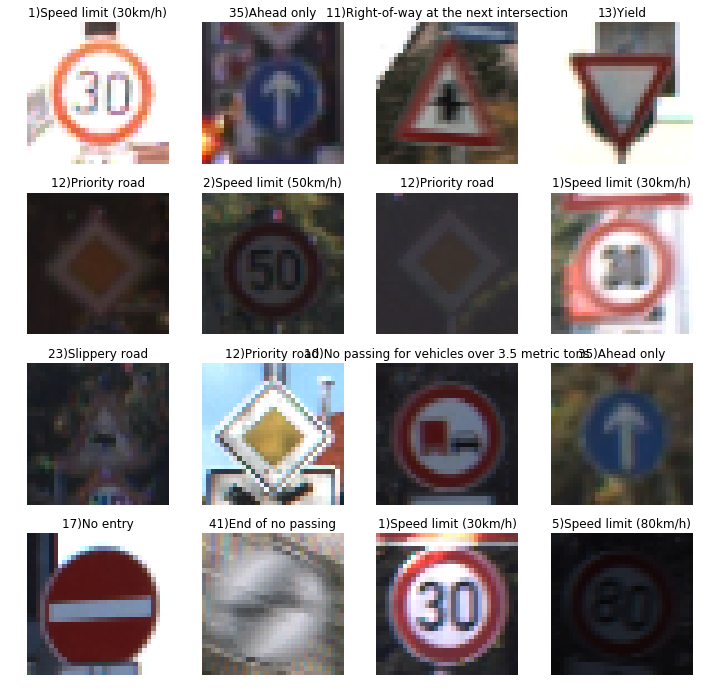

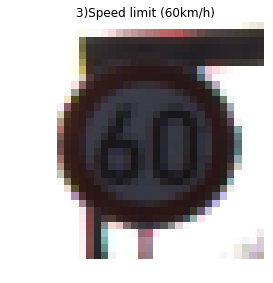

In [5]:
#     print some images
printImgs(X_train, y_train )
printImgs(X_train, y_train, size1=1, size2=1, figsize=(20,20), idxArray=[5000] )

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
# training setup

import tensorflow as tf

In [7]:
# Definition of preProcess function (algorithm) and constants, so I can call it on training set and test images
# using in-place modification of the numpy array 
import cv2
from skimage import exposure

IMAGE_DEPTH = 1 # 3 if not colored, 1 if grayscale

print(X_train.shape)
print(X_test.shape)

PREPROCESS_PARAMS = {'grayscale':True, 'normalize':True, 'doExposure':False, 'doEqualizeHist':False}

def preProcess(in_images, progressInfo=False, grayscale=True, normalize=True, doExposure=True, doEqualizeHist=False):
    outType = np.float32 if normalize else np.uint8
    outImgDimension = 1 if grayscale else 3
    imgDimOne = in_images.shape[1]
    imgDimTwo = in_images.shape[2]
    out_image = np.zeros((len(in_images), imgDimOne , imgDimTwo, outImgDimension), outType)
    
#     for imgIdx in [5000]:
    for imgIdx in range(len(in_images)):
        if(progressInfo and imgIdx%1000==0):
            print("preProcessing image {0}".format(imgIdx))
        img=in_images[imgIdx]
        if(grayscale):
            img = cv2.cvtColor(in_images[imgIdx], cv2.COLOR_BGR2GRAY)
            img = img.reshape((imgDimOne , imgDimTwo, 1))
        
#         The algorithm normalizes the brightness and increases the contrast of the image.
        if(doEqualizeHist and grayscale):
            img = cv2.equalizeHist(img)
        
        if(normalize):
            img = img/img_maxPixel
        # local contrast enhancement http://scikit-image.org/docs/dev/api/skimage.exposure.html
        if(doExposure):
            img = exposure.equalize_adapthist(img.squeeze())
        img = img.reshape((imgDimOne , imgDimTwo, outImgDimension))
        out_image[imgIdx]=img    
    return out_image

(39209, 32, 32, 3)
(12630, 32, 32, 3)


(39209, 32, 32, 3)
(12630, 32, 32, 3)
(4, 32, 32, 1)


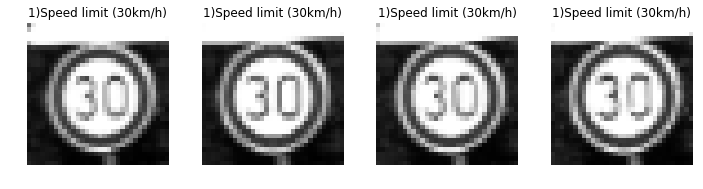

In [8]:
# TEST code - Just to PLAY AROUND with image manipulations


### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


# Grayscale and normalize images through preProcess function.. Notes: fine-tuned the preprocessing,
# using in-place modification of the numpy array 
import cv2
from skimage import exposure

IMAGE_DEPTH = 1 # 3 if not colored, 1 if grayscale

print(X_train.shape)
print(X_test.shape)


fig2 = plt.figure()

X_trainPreprocessed=preProcess(X_train[390:394], **PREPROCESS_PARAMS)
        
print(X_trainPreprocessed.shape)
printImgs(X_trainPreprocessed, y_train[390:394], idxArray=[0,1,2,3], size1=2, size2=2, cmap='gray' )



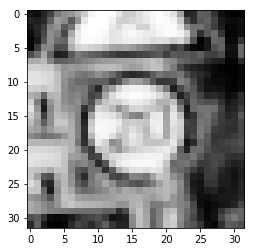

In [9]:
# playing around
X_trainPreprocessed=preProcess(X_train[0:4], grayscale=True, doEqualizeHist=True, normalize=True, doExposure=False)
img = X_trainPreprocessed[0]
plt.figure()

# plt.xticks([]), plt.yticks([])
plt.imshow(img.squeeze(), cmap='gray')
plt.show()

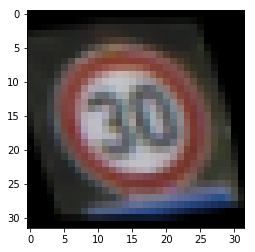

(1, 32, 32, 1)


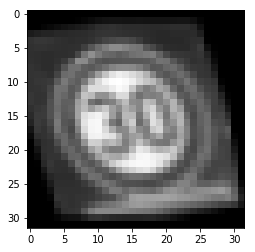

In [10]:
# Transformation code - to increase the amount of data with rotated and affine transformed images

im1 = X_train[500]


def transformImage(im1):
    """Does a small random rotation and affine transformation. Learning from: 
    http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html 
    """
    rotationAngle = np.random.randint(-10,10)
    rotationAngle=10
    M1 = cv2.getRotationMatrix2D((cols/2, rows/2),rotationAngle, 1)
    im1 = cv2.warpAffine(im1, M1, (cols, rows))
    pts1 = np.float32([[3,15],[15,15],[32, 25]])
    pts2 = np.float32([[3+np.random.randint(-1,1),15+np.random.randint(-1,1)],[15+np.random.randint(-1,1),\
    15+np.random.randint(-1,1)],[32+np.random.randint(-1,1),25+np.random.randint(-1,1)]])
    M2 = cv2.getAffineTransform(pts1, pts2)
    im1 = cv2.warpAffine(im1, M2, (cols,rows))
    return im1

im1 = transformImage(im1)
plt.imshow(im1);plt.show()

im1 = preProcess(np.array([im1]), **PREPROCESS_PARAMS)
print(im1.shape)
plt.imshow(im1.squeeze(), cmap="gray");plt.show()


In [11]:
# function to increment images( increase the amount of data)

def incrementBuildImages(in_images,in_labels, progressInfo=False):
    """transformImage images and appends to the end of the list. The new lists are returned.
    in_images - images to be transformed and added incremented, in_labels - the labels; 
    returns out_images and out_labels with the entire set of images/labels """
    
    out_images = np.empty([0,cols,rows,depth_original]).astype(np.uint8)
    
    out_labels = np.empty([0]).astype(np.uint8)
    out_images = np.append(out_images, in_images, axis=0)
    out_labels = np.append(out_labels, in_labels, axis=0)
    idx = 0;
    
    for im in in_images:
        if progressInfo and idx%50==0 :
            print("incrementBuildImages processing image idx {0}".format(idx))
        #doing 5 random transformations
        for sameImgTransf in range(3):
            imTrans1 = transformImage(im)
            out_images = np.append(out_images, np.reshape(imTrans1, (1,32,32,3)), axis=0)
            out_labels = np.append(out_labels, [in_labels[idx]], axis=0)
        idx += 1;
    return out_images, out_labels




(4, 32, 32, 3)
incrementBuildImages processing image idx 0
shape of  (16, 32, 32, 3) (16,)


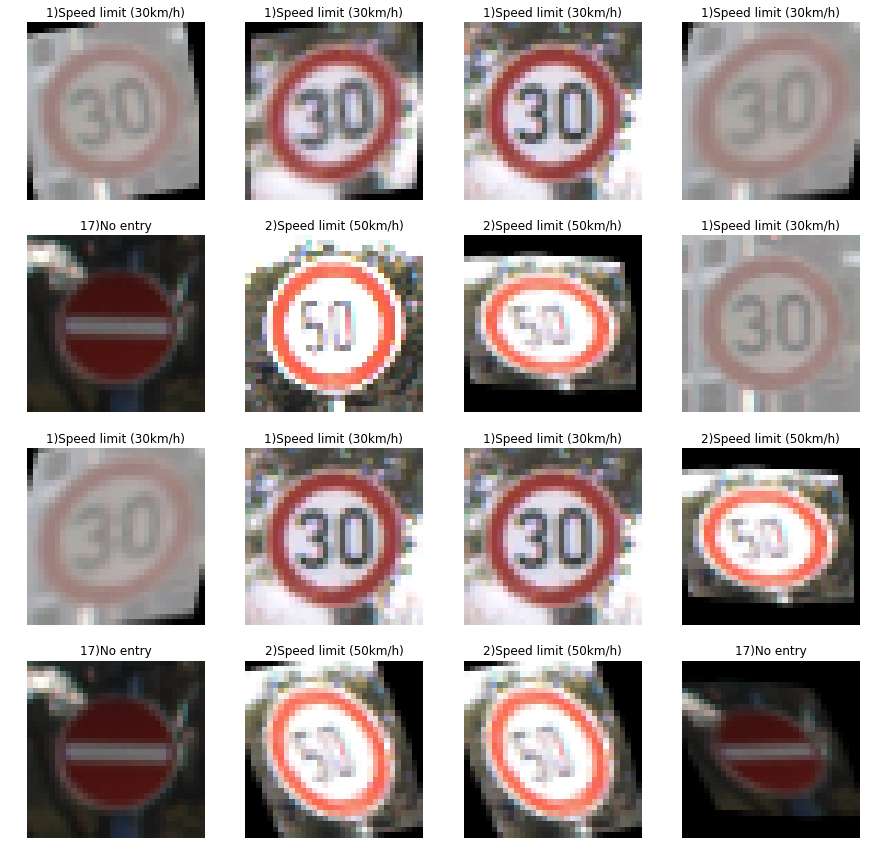

In [12]:
# TEST CODE - to verify the working of the incrementBuildImages on a small subset of images

newImgs = np.array([X_train[211],X_train[2900], X_train[1900], X_train[25000]])
newLabels = np.array([y_train[211],y_train[2900], y_train[1900], y_train[25000]])
print(newImgs.shape)
newImgs, newLabels = incrementBuildImages(newImgs[0:4], newLabels[0:4], progressInfo = True)
print("shape of ",newImgs.shape, newLabels.shape)
printImgs(newImgs, newLabels, size1=4, figsize=(15,15), size2=4)



In [13]:
import os
storageTempPath = '../storage/trainAugmentedData'
testPreprocessedFileName = '../storage/testData/testV1SavePickle.p'

PROCESS_STORE_BATCH_SIZE = 500

def storeAugmentedData(x, y,  progressInfo=True):
    print("### storeAugmentedData called, creating transformed and pre-processed images for augmented data ### ")
    assert len(y) == len(x)
    length = len(x)
    for recIdx in range(0, length, PROCESS_STORE_BATCH_SIZE):
        endRecordIdx = recIdx+PROCESS_STORE_BATCH_SIZE
        if(progressInfo): print("processing record {0} through {1}".format(recIdx, endRecordIdx) )
        newImgs, newLabels = incrementBuildImages(x[recIdx:endRecordIdx], y[recIdx:endRecordIdx], progressInfo = False)
        newImgs = preProcess(newImgs, progressInfo=False, **PREPROCESS_PARAMS)
        augmImageBatchData = dict(images=newImgs, labels=newLabels)
        fileName = storageTempPath+"/augmDataDump{0}.p".format(recIdx);
        print("newImgs", newImgs.shape)
        with open(fileName, 'wb') as f:
            pickle.dump(augmImageBatchData, f,  protocol=pickle.HIGHEST_PROTOCOL)
        if(progressInfo): print("batch saved to {0}".format(fileName));
    print("# storeAugmentedData called, creating transformed and pre-processed images for augmented data #")
        
def storeTestData(x):
    X_testTemp = preProcess(x, progressInfo=True, **PREPROCESS_PARAMS)
    with open(testPreprocessedFileName, 'wb') as handle:
        pickle.dump(X_testTemp, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [14]:
# PREPROCESSING AND TRANSFORMATION - saving and loading the data
# once this runs ones, it will save the data and won't run again as it takes long time to pre-process & augment.

X_trainPreprocessed = np.empty([0,32,32,1], np.uint8)
X_testPreprocessed = np.empty([0,32,32,1], np.uint8)
y_train_incremented = np.empty([0], np.uint8)    


if not os.path.exists(storageTempPath):
    os.makedirs(storageTempPath)
if not os.path.exists('../storage/testData/'):
    os.makedirs('../storage/testData/')


# conditions wheather to process or not the data if it already exists
if os.path.exists(storageTempPath+"/augmDataDump0.p") :
    print('augmDataDump0.p exists, so seems like augmented data exists already')
else:
    print('augmented data doesn\'t seem to exists, will start creating it')
    rangeStart = 0; 
    rangeEnd = len(X_train)
#     rangeEnd = 100
    storeAugmentedData(X_train[rangeStart:rangeEnd], y_train[rangeStart:rangeEnd], progressInfo=True)

if os.path.exists(testPreprocessedFileName):
    print("test data {0} file already exists".format(testPreprocessedFileName))
else:
    pass
    storeTestData(X_test)
#     storeTestData(X_test[0:50]) #when I need to run a small batch for debugging/testing, same as above




augmDataDump0.p exists, so seems like augmented data exists already
test data ../storage/testData/testV1SavePickle.p file already exists


In [15]:
# Load pre-processed and transformed data
for filename in os.listdir(storageTempPath):
    with open(os.path.join(storageTempPath,filename), 'rb') as f:
        augmImageBatchData = pickle.load(f)
        images = augmImageBatchData['images']
        labels = augmImageBatchData['labels']
        X_trainPreprocessed = np.append(X_trainPreprocessed, images, axis=0)
        y_train_incremented = np.append(y_train_incremented, labels)

with open(testPreprocessedFileName,'rb') as handle:
    X_testPreprocessed = pickle.load(handle)

# some verifications
print('X_trainPreprocessed', X_trainPreprocessed.shape)
print('y_train_incremented', y_train_incremented.shape)
print('X_testPreprocessed', X_testPreprocessed.shape)
print('y_test', y_test.shape)


X_trainPreprocessed (156836, 32, 32, 1)
y_train_incremented (156836,)
X_testPreprocessed (12630, 32, 32, 1)
y_test (12630,)


X_trainPreprocessed[9,0,0,:]=[ 0.14117648]
after processing image shapes: (156836, 32, 32, 1) (12630, 32, 32, 1)
Sample of normalized data [ 0.20392157]
Max/min normalized data point  1.0 0.0


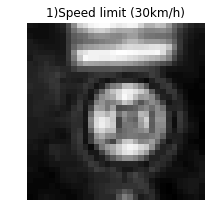

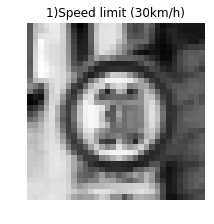

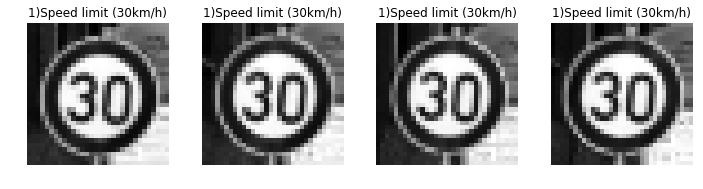

In [16]:
# preprocessing verifications

print("X_trainPreprocessed[9,0,0,:]={0}".format(X_trainPreprocessed[9,0,0,:]))
print('after processing image shapes:', X_trainPreprocessed.shape, X_testPreprocessed.shape)


printImgs(X_trainPreprocessed, y_train_incremented, size1=1, figsize=(15,15), size2=1, idxArray=[100] , cmap='gray')
printImgs(X_testPreprocessed, y_test, size1=1, figsize=(15,15), size2=1, idxArray=[100] , cmap='gray')

print("Sample of normalized data", X_trainPreprocessed[0, 0, 0, :])
print("Max/min normalized data point ", np.max(X_trainPreprocessed),np.min(X_trainPreprocessed))

printImgs(X_trainPreprocessed, y_train_incremented, idxArray=[0,1,2,3], size1=2, size2=2, cmap='gray' )

In [17]:
from sklearn.utils import shuffle



39209
X/y training/validation shapes = (117627, 32, 32, 1) (39209, 32, 32, 1) (117627,) (39209,)


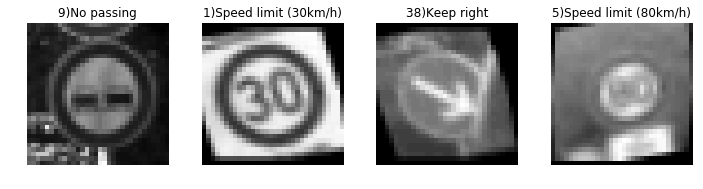

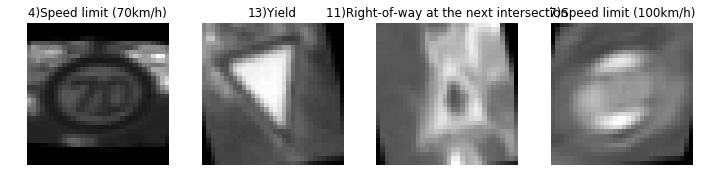

In [18]:
## This code below allows me to get quick results while setting up/troubleshooting the pipeline

splitRatio = 0.75
print(n_train)

def randomValidationSplit(X,y,splitRationParam=splitRatio):
    X, y = shuffle(X, y)
    subsetTrainIdx = int(len(X)*splitRationParam)
    ## split training data into training and validation set
    X_training, X_validation =  X[:subsetTrainIdx], X[subsetTrainIdx:]
    y_training, y_validation = y[:subsetTrainIdx], y[subsetTrainIdx:]
    return (X_training, y_training, X_validation, y_validation)


X_training, y_training, X_validation, y_validation = randomValidationSplit(X_trainPreprocessed, y_train_incremented)


print("X/y training/validation shapes =",X_training.shape, X_validation.shape, y_training.shape, y_validation.shape)

printImgs(X_training, y_training, idxArray=[0,1,2,3], size1=2, size2=2, cmap='gray' )

printImgs(X_validation, y_validation, idxArray=[0,1,2,3], size1=2, size2=2, cmap='gray' )

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_


**Answer:**

I shuffle the data because I noticed that many consecutive images are simmilar which need shuffled especially if I am planning to divide data between validation and training sets. Also made sure to include all the attributes like sizes, labels, etc. 

Then I normalized the data, dividing by 255 (max value). I tried a tensorflow l2_normalize, but it was slow or even failing. 

In [19]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

I took about a quarter of the dataset as validation set, and left the training set be first 30,000 images after being shuffled. 

**Answer:**

In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# let's start by repeating LeNet architecture
# input - conv+act - pooling - conv+act - pooling - flatten - fullyConnect+act - fullyConnect
from tensorflow.contrib.layers import flatten


def NNet4(x, dropoutArg):
    mu = 0
    sigma = 0.1
    
    conv0_w = tf.Variable( tf.truncated_normal(shape=(5,5,IMAGE_DEPTH,3), mean=mu, stddev=sigma) )
    conv0_b = tf.Variable(tf.zeros(3))
    conv0 = tf.nn.conv2d(x, conv0_w, strides=[1,1,1,1], padding='SAME')+conv0_b
    conv0 = tf.nn.relu(conv0)
    

    conv1_w = tf.Variable( tf.truncated_normal(shape=(5,5, 3,6), mean=mu, stddev=sigma) )
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(conv0, conv1_w, strides=[1,1,1,1], padding='VALID')+conv1_b
    conv1 = tf.nn.relu(conv1)
    
    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    conv2 = tf.nn.relu(conv2)

    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. 
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 84), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(84))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, dropoutArg)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(84, 42), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(42))
    
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    

    return logits
#



# some alternatives I tried:
# 1) Pooling. Input = 28x28x6. Output = 14x14x6.-> #Pooling. Input = 10x10x16. Output = 5x5x16. ->
#   flatten. In=5x5x16,Out= 400-> Fully Connected in=400,out=120 -> relu -> Fully Connected in=120,Out=84 -> Activation

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I followed closely LeNet architecture, I have 
Convolution - relu - pooling --->

Convolution - relu - pooling --->

fully connected - relu --->

fully connected - relu --->

fully connected to output 

In [21]:
x = tf.placeholder(tf.float32, (None, 32, 32, IMAGE_DEPTH))
y = tf.placeholder(tf.int32, (None))
learning_rate_plh = tf.placeholder(tf.float32, (None))
one_hot_y = tf.one_hot(y , 42)
keep_prob=tf.placeholder(tf.float32)
ratePlh = tf.placeholder(tf.float32)

In [22]:
### Train your model here.
### Feel free to use as many code cells as needed.

rate_1 = 0.001
rate_2 = 0.0002
rate_3 = 0.0001


dropout = 0.5

logits = NNet4(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_plh)
training_operation = optimizer.minimize(loss_operation)

In [23]:
BATCH_SIZE = 512

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples, loss

In [31]:
EPOCHS = 40

def exectueTraining():

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print("Training...")
        print()
        rateIdx = 0;
        currentRate = rate_1;
        for i in range(EPOCHS):
            if i < 3 :
                currentRate = rate_1
            if i < 20:
                currentRate = rate_2
            else:
                currentRate = rate_3

            X_training, y_training, X_validation, y_validation = randomValidationSplit(X_trainPreprocessed[:],
                                                                                       y_train_incremented[:])

        #         printImgs(X_training, y_training, size1=1, figsize=(15,15), size2=1, idxArray=[5000] , cmap='gray')
            for offset in range(0, len(X_training), BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_training[offset:end], y_training[offset:end]

                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, 
                                                        keep_prob:dropout, learning_rate_plh:currentRate})  #,rate:currentRate 

            validation_accuracy, loss = evaluate(X_validation, y_validation)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}, loss={:.3f}".format(validation_accuracy, loss))

        test_accuracy, loss = evaluate(X_testPreprocessed, y_test)
        print("Test Accuracy = {:.3f}, loss={:.3f}".format(test_accuracy, loss))


        saver.save(sess, './trafPredResult')
        print("Model saved")
        
def printLastExecutionData():
    print("Output from the last exectueTraining:")
    with open('./exectueTraining.log', 'r') as f:
        print(f.read())

# exectueTraining takes long time, and I ran it on AWS to speed things up. Thus printLastExecutionData() will print the 
# results of last training instead, if needed to refresh the notebook, but don't wan't to wait through NN training

# to train it - uncomment line below
exectueTraining()
# To print last training data - uncomment line below
# printLastExecutionData()

Training...

EPOCH 1 ...
Validation Accuracy = 0.252, loss=2.972
EPOCH 2 ...
Validation Accuracy = 0.457, loss=2.017
EPOCH 3 ...
Validation Accuracy = 0.571, loss=1.574
EPOCH 4 ...
Validation Accuracy = 0.650, loss=1.207
EPOCH 5 ...
Validation Accuracy = 0.700, loss=0.958
EPOCH 6 ...
Validation Accuracy = 0.736, loss=0.987
EPOCH 7 ...
Validation Accuracy = 0.760, loss=0.972
EPOCH 8 ...
Validation Accuracy = 0.774, loss=0.856
EPOCH 9 ...
Validation Accuracy = 0.793, loss=0.723
EPOCH 10 ...
Validation Accuracy = 0.806, loss=0.675
EPOCH 11 ...
Validation Accuracy = 0.821, loss=0.671
EPOCH 12 ...
Validation Accuracy = 0.830, loss=0.695
EPOCH 13 ...
Validation Accuracy = 0.841, loss=0.530
EPOCH 14 ...
Validation Accuracy = 0.850, loss=0.518
EPOCH 15 ...
Validation Accuracy = 0.857, loss=0.437
EPOCH 16 ...
Validation Accuracy = 0.863, loss=0.559
EPOCH 17 ...
Validation Accuracy = 0.869, loss=0.400
EPOCH 18 ...
Validation Accuracy = 0.873, loss=0.469
EPOCH 19 ...
Validation Accuracy = 0.880, 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:**
 Training took me quite some time to get above 90%. I used Adam optimized to which I passed my neural network pipeline. 
 For the Neural Network - I settled with the fourth version that I wrote, previous ones I tried were either much slower or I thought overfitting as the accuracy was going down on the test dataset.

Strangely enough to me, changing the batch size did change the accuracy, not sure yet why, but a batch size 512 seems to give me good performance (speed) as well as good accuracy.
Other hyperparams I was changing - the rate of learning. Smaller rates were better but slower, so at the end I did variable rates - starting with rate_1 = 0.001 and gradually decreasing it to 0.0001 for later epochs. This way I was getting faster accuracy increase at the beginning, but avoiding quick degradation of accurancy in later epocs.

A dropout of 0.5 seems to be good, after trying with a higher 0.75 and not seeing as much improvement in avoiding overfitting.

The number of epochs seem to matter in relationship with learning rate. At higher learning rate after certain number of epochs accuracy started to go down to near zero. As I decreased the learning rate I noticed that the more epochs the higher accuracy I could get in average, so settled with 40 epochs. 

The amount of data seemed to be critical to get over .9 accuracy on validation set. Thus I used random max 10% rotation and affine transformation to generate new images from existing ones, and augment my dataset. 


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I started  with LeNet architecture for the neural net pipeline, to have a starting point. After I adjusted for the image sizes, I tried adding or removing layers, adding a dropout layer. It was a trial and error process. 
Also kept changing the hyperparameters: learning rate, number of epochs and batch size. 
Also tried training with/without color information and there wasn't significant accuracy difference, thus choose to ignore color and use black and white images.
Tried to do addditional processing like local contrast enhancement and normalize exposure. Later stopped using it as both the learning didn't perform as well and I was less able to distinguish the images. It was interesting to try the techniques as I read about them in other articles, and it might work in other circumstances or in conjuction with other tecniques.
Initally I did normalize the images (to have values between 0 and 1) but later I ended up not using this flag in the function. I think I should try with normalize=True again to see if I get any improvements, but will leave that for a future iteration. 

Data augmentation is what helped move from mid 80% to over 90% accuracy. The process was slow using cv2 and the CPU instead of GPU, but saving the 600MB of augmented data files allowed for fast retrieval of augmented images onces the files were created. 



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

My custom images with expected labels:


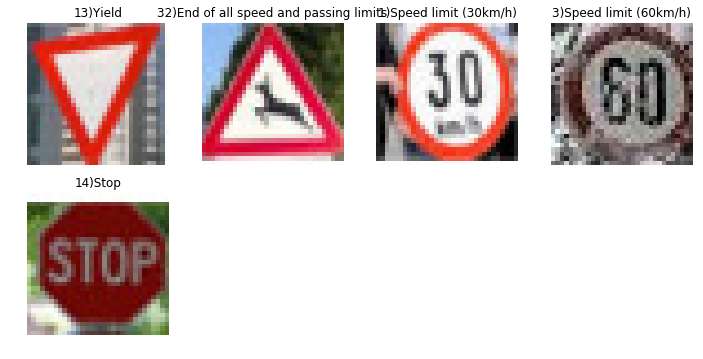

In [73]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

images = np.empty([0,32,32,3]).astype(np.uint8)
filenames = []
computedLabels = np.empty([0,1])
folderName = 'customImg'
for filename in os.listdir(folderName):
    testim = cv2.imread(os.path.join(folderName, filename))
    testim = cv2.cvtColor(testim, cv2.COLOR_BGR2RGB)
    testim = np.reshape(testim, (1,32,32,3))
    images = np.append(images, testim , axis=0)
    filenames.append(filename)

testLabelIdx = None
testLabelIdxExpected = np.array([13, 32, 1, 3, 14])

print("My custom images with expected labels:")
printImgs(images,testLabelIdxExpected, size1=5, size2=1, idxArray=[0,1,2,3,4])


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I plotted the images below. 
First when I tried with original data set (without incrementing it extra transformed images), it predicted correctly one or two images.  
The reason I believe is because the images were slightly different. Transfromation should help.

After running on the dataset with the transformation the result is -  images were recognized correctly, 3 images were not. 




(5, 42)
<class 'numpy.ndarray'>
My images - Neural Network results (indexes) = [13,  2, 12,  1, 14]
My images - expected indices =                 [13, 32,  1,  3, 14]
images shape= (5, 32, 32, 3)


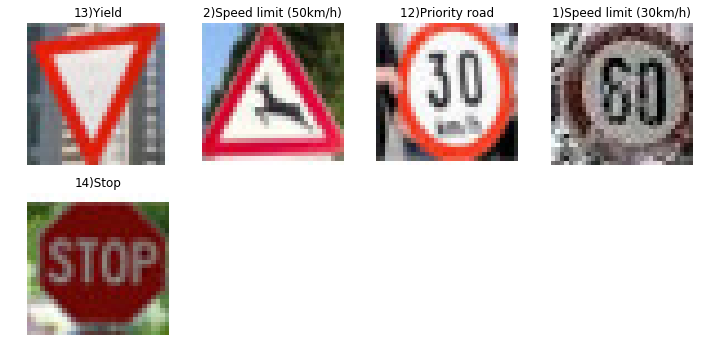

In [80]:
### Run the predictions here.
### Feel free to use as many code cells as needed.


imagesProc = preProcess(images, **PREPROCESS_PARAMS)

logit_on_custom_imgs = None
with tf.Session() as sess:
    s = tf.train.latest_checkpoint('.')
    saver.restore(sess, tf.train.latest_checkpoint('.'))

#     print(imagesProc.shape)
    logit_on_custom_imgs = sess.run(logits,feed_dict={x:imagesProc,keep_prob:1.0})
    print(logit_on_custom_imgs.shape)
    v = sess.run(tf.argmax(logit_on_custom_imgs, 1))
    testLabelIdx = v
    print(type(testLabelIdx))
    print('My images - Neural Network results (indexes) =', np.array2string( testLabelIdx, separator=', ') )

print('My images - expected indices =                ', np.array2string( testLabelIdxExpected, separator=', ') )
    

print("images shape=", images.shape)
printImgs(images,testLabelIdx, size1=5, size2=1, idxArray=[0,1,2,3,4])




### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

the accuracy wasn't as high on my images. I used the lables from signnames.csv to visualize the output and the lable on the same plot, so was able to see if the image matches the label. 

Next, using softmax to compute the results gives me:


images shape= (5, 32, 32, 3)


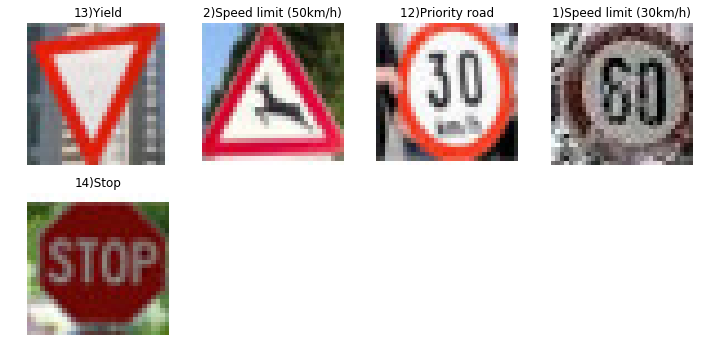

In [81]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.



print("images shape=", images.shape)
printImgs(images,testLabelIdx, size1=5, size2=1, idxArray=[0,1,2,3,4])






### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
As it can be seen in the code I exectued below,
 - first and last image were predicted correctly, 
 - image 2, 3 and 4 - expected results were not in top 5. 
 
 

In [83]:

with tf.Session() as sess:
    topK = tf.nn.top_k(logit_on_custom_imgs, k=5)
    print(sess.run(topK))
    
print('My images - expected indices =                ', np.array2string( testLabelIdxExpected, separator=', ') )
    

TopKV2(values=array([[-164.52139282, -175.04351807, -187.46502686, -190.89074707,
        -199.23631287],
       [-215.49159241, -226.02714539, -229.95085144, -231.93222046,
        -232.39237976],
       [-283.49447632, -285.8404541 , -301.5692749 , -311.20846558,
        -311.48254395],
       [-157.88972473, -158.16069031, -159.07913208, -161.66610718,
        -161.98362732],
       [-110.25479126, -116.25566864, -118.91592407, -120.43390656,
        -122.1468277 ]], dtype=float32), indices=array([[13, 33, 35,  9, 28],
       [ 2, 31,  5, 21,  1],
       [12, 40, 11, 23,  9],
       [ 1,  2,  4,  0,  5],
       [14, 38, 15, 34, 13]], dtype=int32))
My images - expected indices =                 [13, 32,  1,  3, 14]


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.